In [423]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [424]:
from sklearn import linear_model, metrics

/tmp/ipykernel_16844/3571343094.py:21: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  mydf=pd.read_csv('gnps2.csv',  sep=',')


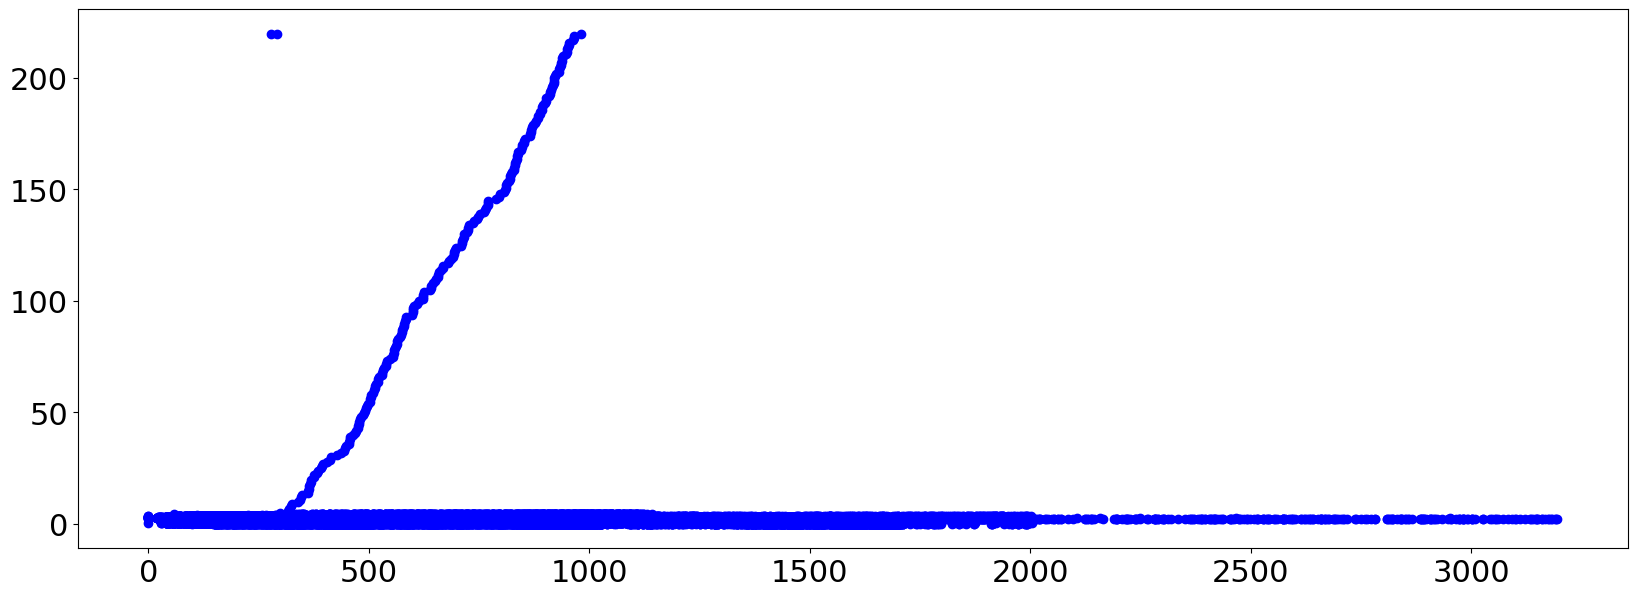

90918 90918
[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 219 221]
200
90718 90718


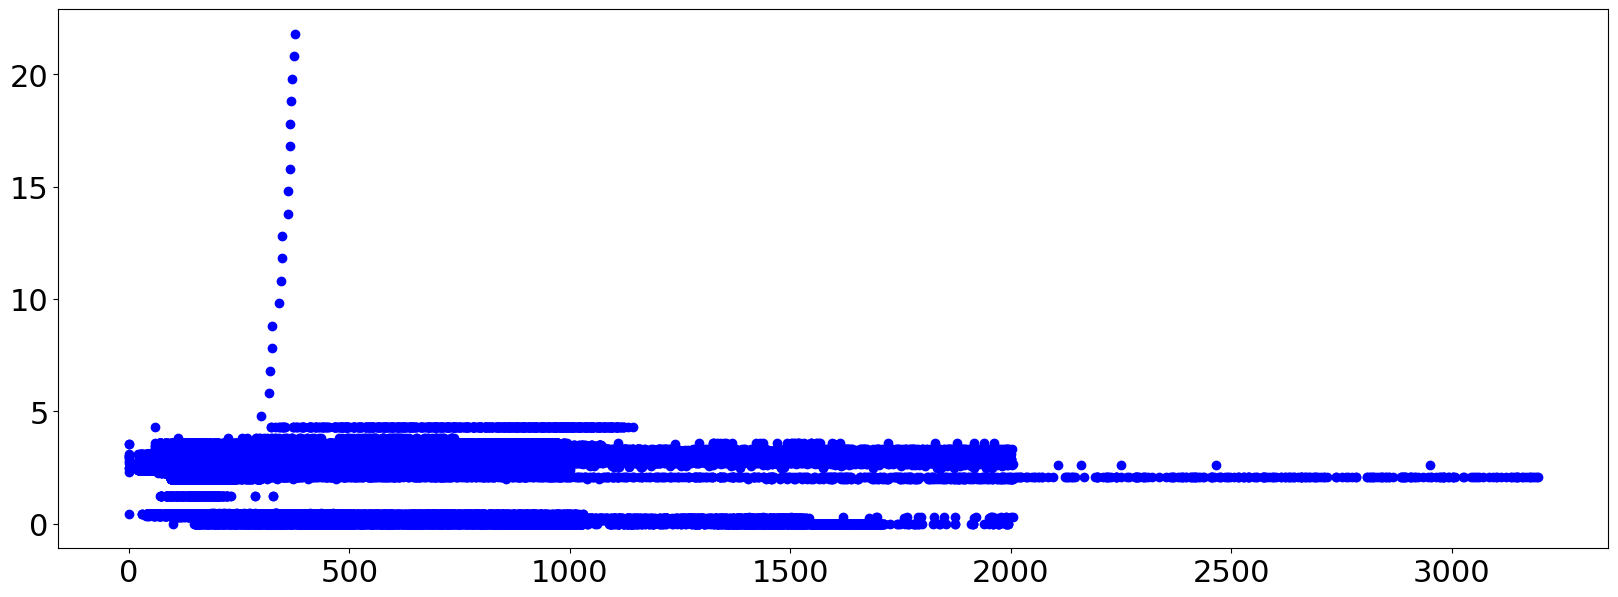

In [467]:
import decimal
from decimal import Decimal
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.kernel_ridge import KernelRidge
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
np.set_printoptions(suppress=True)

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

mydf=pd.read_csv('gnps2.csv',  sep=',')
mydf.columns=['d','mz','mw','alogp','hba','hbd','psa','rotb','arom','alerts','qed','','chelator','herg','hepatotox','ames','skin','ld50','dili','1A2inhibitor','3A4inhibitor','2c9inhibitor','2c19inhibit','2d6inhibit','','','']

#my
#mydf.columns=['molecule number', 'FDA approved name', 'mz', 'smiles', 'mw', 'alogp', 'hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed', 'fraction sp3 hybridized carbons']

# Initialize lists and set random seed
#print(mydf)
list_x = mydf['mz'].tolist()
#print(list_x)
list_x=list(np.float_(list_x))
list_x=np.reshape(list_x,(-1,1))
list_y = mydf['ld50'].to_numpy().reshape(-1,1)
list_x_pred = []
list_y_real = []

np.set_printoptions(precision = 3, suppress = True)

list_y = np.nan_to_num(list_y)

list_x = np.nan_to_num(list_x)

        
list_y=pd.DataFrame(list_y)
list_x=pd.DataFrame(list_x)
list_x.to_csv()
list_y.to_csv('myyvalues.csv')
#print(list_y.min())
#print(list_y.max())
list_ymean=list_y.mean()
list_ystd=list_y.std()

import matplotlib.pyplot as plt
plt.scatter(list_x, list_y, c ="blue")
 
# To show the plot
plt.show()


from scipy import stats
z = np.abs(stats.zscore(list_y)) 
threshold = 3
 
# Position of the outlier
outliers=np.where(z > 3)
print(len(list_x), len(list_y))
print(outliers[0])
print(len(outliers[0]))

list_x.drop(outliers[0],inplace = True)


list_y.drop(outliers[0],inplace = True)
print(len(list_x), len(list_y))

plt.scatter(list_x, list_y, c ="blue")
 
# To show the plot
plt.show()

In [468]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [469]:
# ####################
# Fit regression model
train_size = 100 # Change here to try different amounts of data
krr = GridSearchCV(KernelRidge(kernel='rbf',alpha=100),
                  param_grid={"gamma": np.logspace(-400, 400, 2)})

krr.fit(list_x[:train_size], list_y[:train_size])

print('Best gamma from CV: ',krr.best_params_)
print('Length scale =',1/np.sqrt(2*krr.best_params_['gamma']))
krr.score(list_x, list_y )

/home/patrickchirdon/Documents/biosortia-lipinski/biosortia/lib/python3.10/site-packages/numpy/core/function_base.py:284: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
/home/patrickchirdon/Documents/biosortia-lipinski/biosortia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/patrickchirdon/Documents/biosortia-lipinski/biosortia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/patrickchi

Best gamma from CV:  {'gamma': 0.0}
Length scale = inf


-0.015225158479404088

(0, 0)


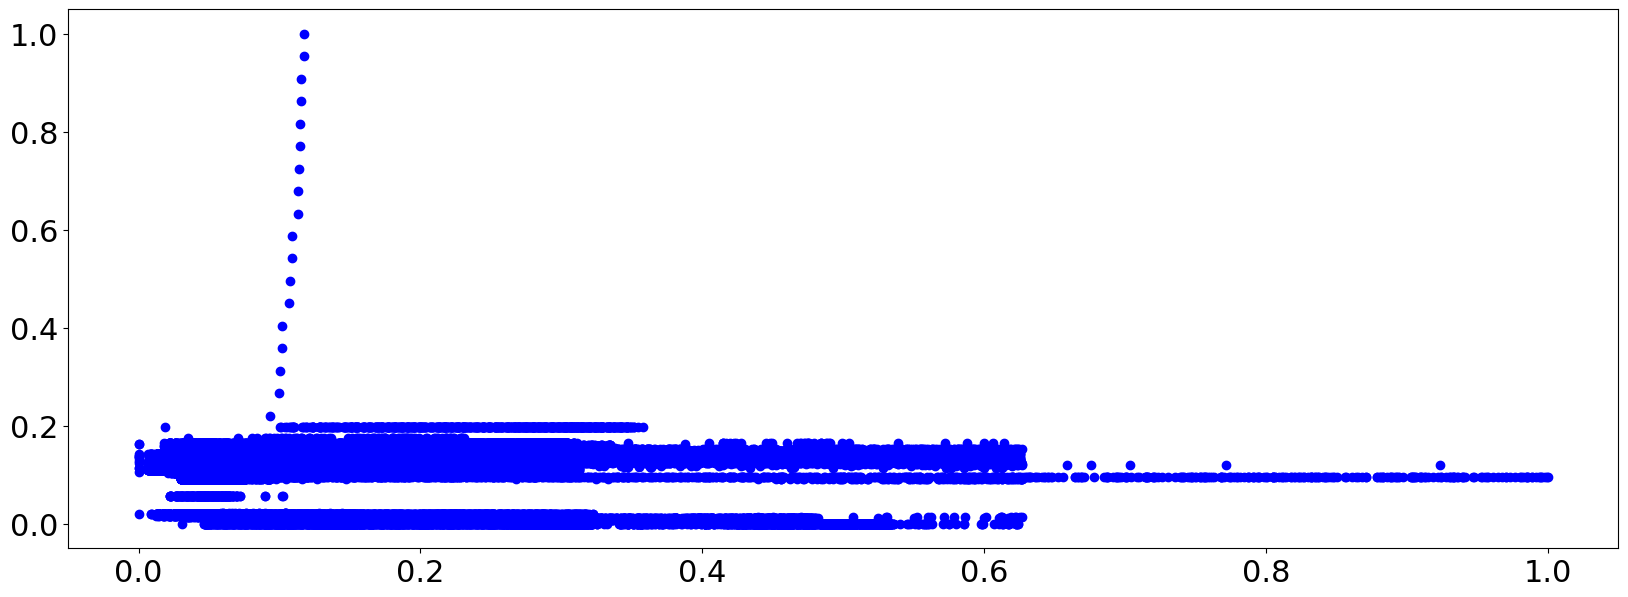

In [470]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

X_plot = np.linspace(0, 10, 1000)[:, None]
#scaler = preprocessing.StandardScaler()
scaler = MinMaxScaler()
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)
print(minmax(list_y))
list_x = scaler.fit_transform(list_x)
list_y = scaler.fit_transform(list_y)
import matplotlib.pyplot as plt
plt.scatter(list_x, list_y, c ="blue")
 
# To show the plot
plt.show()



In [471]:
xtrain, xtest, ytrain, ytest=train_test_split(list_x, list_y, test_size=0.15)

In [472]:
import numpy as np
import pandas as pd

# For chapter 4
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For chapter 5
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import time

# For chapter 6
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV



In [473]:
scaler = StandardScaler()

scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

trainX, testX, trainY, testY = train_test_split(xtrain, ytrain, test_size = 0.2)
testY

array([[0.122],
       [0.126],
       [0.146],
       ...,
       [0.125],
       [0.143],
       [0.152]])

In [474]:
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)


In [447]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


In [300]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:


%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)
 


In [301]:
X_plot = np.linspace(0, 10, 1000)[:, None]
scaler = preprocessing.StandardScaler()
list_x = scaler.fit_transform(list_x)
list_y = np.nan_to_num(list_y)

list_x = np.nan_to_num(list_x)

list_y=np.asarray(list_y)

list_y=list_y.reshape(1, -1)
list_y = scaler.fit_transform(list_y)
list_y
n_samples, n_features = 1, 5
#krr = KernelRidge(alpha=5)
#krr.fit(list_x, list_y)
#predy=krr.predict(list_x)
#krr.score(list_y, predy )
ridge = linear_model.Ridge(alpha=4)
lasso = linear_model.Lasso(alpha=.1)

# ####################
# Fit regression model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(trainX, trainY)


#score
print(lasso_cv.score(trainX, trainY))
print(lasso_cv.score(testX, testY))


elastic = linear_model.ElasticNet(alpha=10, l1_ratio=.5, random_state=0, normalize=True)
lasso_lars = linear_model.LassoLars(alpha=.1)
bayesian_ridge = linear_model.BayesianRidge()
logistic = linear_model.LogisticRegression(solver='liblinear')
sgd = linear_model.SGDRegressor()

models = [ridge, lasso, elastic, lasso_lars, bayesian_ridge, logistic, sgd]



/home/patrickchirdon/Documents/biosortia-lipinski/biosortia/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.00020384975890641588
0.00011588799278683393


TypeError: ElasticNet.__init__() got an unexpected keyword argument 'normalize'

In [ ]:
trainX.reshape(1, -1)

ridge.fit(trainX, trainY, sample_weight=2)
lasso.fit(trainX, trainY)
elastic.fit(trainX, trainY)
lasso_lars.fit(trainX, trainY)
bayesian_ridge.fit(trainX, trainY, sample_weight=.02)
sgd.fit(trainX,trainY)

In [ ]:
ypredridge=ridge.predict(testX)
ypredlasso=lasso.predict(testX)
ypredelastic=elastic.predict(testX)
ypredlassolars = lasso_lars.predict(testX)
ypredbayesian=bayesian_ridge.predict(testX)
sgdpredict=sgd.predict(testX)

In [302]:
testY[~np.isfinite(testY)] = 0
ypredridge[~np.isfinite(ypredridge)] = 0


sgdscore = sgd.score(testY, ypredridge)
print("R-squared:", sgdscore)

NameError: name 'sgd' is not defined

In [303]:

score = bayesian_ridge.score(testY, ypredridge)
print("R-squared:", score)

NameError: name 'bayesian_ridge' is not defined

In [304]:
lasso_lars.score(testY, ypredlassolars)



NameError: name 'lasso_lars' is not defined

In [305]:
elastic.score(testY, ypredelastic)

NameError: name 'elastic' is not defined

In [306]:
lasso.score(testY, ypredlasso)



NotFittedError: This Lasso instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [307]:
ridge.score(testY, ypredridge)

NotFittedError: This Ridge instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [308]:
trainX

array([[ 0.633],
       [-0.602],
       [ 1.557],
       ...,
       [-1.036],
       [ 0.191],
       [ 1.544]])

In [309]:
testY

array([[0.002],
       [0.004],
       [0.002],
       ...,
       [0.001],
       [0.006],
       [0.001]])

In [310]:
ypred=lasso.predict(testX)

#z = (x - u) / s
#where u is mean and s is standard dev


print( "Predicted values ", np.round( ypred[:10], 10 ) ) 



NotFittedError: This Lasso instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [311]:
df_preds = pd.DataFrame({'Actual': testY.squeeze(), 'Predicted': ypred.squeeze()})
print(df_preds)
df_preds.to_csv('mypreds.csv')

ValueError: All arrays must be of the same length

In [312]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(testY, ypred)
mse = mean_squared_error(testY, ypred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.14f}')
print(f'Mean squared error: {mse:.14f}')
print(f'Root mean squared error: {rmse:.5f}')

mydf=pd.read_csv('haloperidol.csv', sep=',')

mydf.columns=['molecule','number','FDA','approved','name','mz','smiles','mw','alogp','hba','hbd','psa','rotb','arom','alerts','qed','pains','fsp3','cacao','half','life','logs','logd','bioconcen','igc50','lc50fm','lc50dm','npscore','chelator','Nr-ar','Nr-ar-lbd','Nr-ahr','Nr-aromatase','Nr-er','Nr-er-lbd','Nr-ppar-gamma','Sr-are','Sr-atad5','Sr-hse','Sr-mmp','Sr-p53','dili'] 
#mydf.columns=['molecule number', 'FDA approved name', 'mz', 'smiles', 'mw', 'alogp', 'hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed', 'fraction sp3 hybridized carbons']


print(mydf)
list_x = mydf['mz']

list_x=list_x.astype(float)
list_x=list_x.to_numpy().reshape(-1,1) 
list_y = mydf['herg'].to_numpy().reshape(-1,1) 
list_x_pred = [] 
list_y_real = []

np.set_printoptions(precision = 5, suppress = True)

list_ya = np.nan_to_num(list_y)

list_xa = np.nan_to_num(list_x)

list_y=pd.DataFrame(list_y)

ymean=list_y.mean()
ystd=list_y.std()
mydf['dili']





ValueError: Found input variables with inconsistent numbers of samples: [166532, 169504]

# mydf=pd.read_csv('compound18.csv', sep=',')
mydf.columns=['molecule','number','FDA','approved','name','mz','smiles','mw','alogp','hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed','pains','fsp3','cacao','half','life','logs','logd', 'bioconcen', 'igc50', 'lc50fm', 'lc50dm', 'npscore', 'chelator', 'Nr-ar', 'Nr-arlbd',	'Nr-ahr', 'Nr-aromatase', 'Nr-er', 'Nr-er-lbd', 'Nr-ppar-gamma', 'Sr-are', 'Sr-atad5', 'Sr-hse', 'Sr-mmp', 'Sr-p53']
#mydf.columns=['molecule number', 'FDA approved name', 'mz', 'smiles', 'mw', 'alogp', 'hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed', 'fraction sp3 hybridized carbons']

# Initialize lists and set random seed
print(mydf)
list_x = mydf['mz']

list_x=list_x.astype(float)
list_x=list_x.to_numpy().reshape(-1,1)
list_y = mydf['chelator'].to_numpy().reshape(-1,1)
list_x_pred = []
list_y_real = []

np.set_printoptions(precision = 5, suppress = True)

list_ya = np.nan_to_num(list_y)

list_xa = np.nan_to_num(list_x)

        
list_y=pd.DataFrame(list_y)

ymean=list_y.mean()
ystd=list_y.std()
mydf['chelator']

In [313]:

#scaler = preprocessing.StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler=preprocessing.MinMaxScaler()
list_x = scaler.fit_transform(list_x)
list_y = scaler.fit_transform(list_y)


In [314]:
ypredridge=ridge.predict(list_x)
ypredlasso=elastic.predict(list_x)

ypredelastic=elastic.predict(list_x)
ypredlassolars = lasso_lars.predict(list_x)
ypredbayesian=bayesian_ridge.predict(list_x)
sgdpredict=sgd.predict(list_x)

yhat = scaler.inverse_transform(ypredlasso)
print(yhat)


NotFittedError: This Ridge instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [315]:
yhat.mean()

0.49679834

In [316]:
df_preds = pd.DataFrame({'Actual': list_y.squeeze(), 'Predicted': yhat.squeeze()})
print(df_preds)

ValueError: Per-column arrays must each be 1-dimensional

In [317]:
#z = (x - u) / s
#where u is mean and s is standard dev
myval=ypredlasso[0] * list_ystd + list_ymean

print(myval)


0    7.947903
dtype: float64


In [318]:


.000815 * 5.681747e-17 + 0.149406

0.149406

In [319]:
list_y.std()

0.0

In [320]:
list_y.columns=['qed']

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [321]:
list_y['qed']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [322]:
print("std of arr : ", np.std(list_y['qed']))
  

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [323]:
mydf=pd.read_csv('GNPStrainqed',  sep='\t')

/tmp/ipykernel_16844/3908447724.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  mydf=pd.read_csv('GNPStrainqed',  sep='\t')


In [324]:
testY

array([[0.002],
       [0.004],
       [0.002],
       ...,
       [0.001],
       [0.006],
       [0.001]])

/home/patrickchirdon/Documents/biosortia-lipinski/biosortia/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


851/851 [==============================] - 1s 1ms/step

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Neural Network RMS 0.04409528096908141


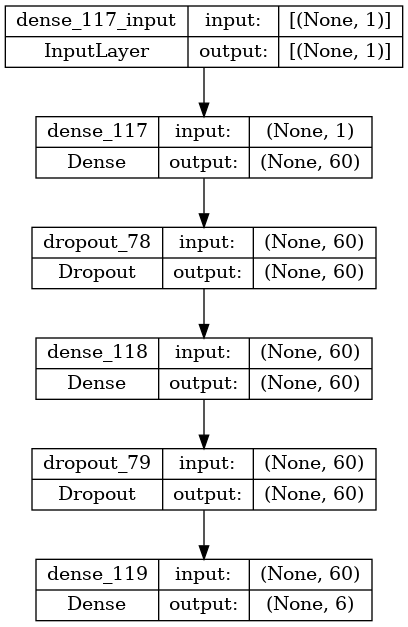

In [475]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers as WeightRegularizer
from keras.optimizers import SGD
    #SKlearn for metrics and datasplits
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, roc_curve
    #Matplotlib for plotting
from matplotlib import pyplot as plt
from keras.regularizers import l2

    # In[11]:


    #Convert to Numpy arrays
from sklearn.preprocessing import StandardScaler
X = np.array(list(list_x))
y = list_y


# In[12]:


train_size=int(.7* X.shape[0])
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:],y[0:train_size],y[train_size:]
from keras.utils.vis_utils import plot_model


model = Sequential()
model.add(Dense(60, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.6, input_shape=(1,)))
model.add(Dense(60, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.6, input_shape=(1,)))
model.add(Dense(6, activation='sigmoid'))
    # In[34]:
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer=SGD(lr=.001, momentum=0.9, nesterov=True))
model.fit(X_train, y_train, epochs=1, batch_size=2)
    
    
y_pred = model.predict(X_test)
rms = (np.mean((y_test.reshape(-1,1) - y_pred)**2))**0.5
s = np.std(y_test -y_pred)
!pip install pydot
!pip install graphviz
print("Neural Network RMS", rms)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
predneuro=model.predict(testY)

In [476]:
import pickle
# save the model to disk
filename = 'LD50.pkl'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-20 20:58:24         2435
variables.h5                                   2023-03-20 20:58:24        38904
metadata.json                                  2023-03-20 20:58:24           64


In [175]:

yhat = scaler.inverse_transform(predneuro)

In [ ]:
predneuro

In [ ]:
yhat.mean()

In [ ]:
testY